In [1]:
import pandas as pd
import numpy as np
import string
import os
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /home/lin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,review_id,user_id,business_id,review_rating,date,text,useful,funny,cool,...,postal_code,latitude,longitude,stars,review_count,is_open,category,text_nopunct,text_lower,text_nostopwords
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,...,H2T 2M1,45.523333,-73.594859,4.0,84.0,1.0,Restaurants,Super simple place but amazing nonetheless Its...,"['super', 'simple', 'place', 'but', 'amazing',...","['super', 'simple', 'place', 'amazing', 'nonet..."
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,...,H4C 1S7,45.472902,-73.588321,4.5,50.0,1.0,Restaurants,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'that', 'chan...","['small', 'unassuming', 'place', 'changes', 'm..."
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,...,H2V 1V1,45.522144,-73.607076,4.0,70.0,1.0,Restaurants,Lesters is located in a beautiful neighborhood...,"['lesters', 'is', 'located', 'in', 'a', 'beaut...","['lesters', 'located', 'beautiful', 'neighborh..."
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,...,H3B 1B9,45.502510,-73.570119,3.5,61.0,1.0,Restaurants,Love coming here Yes the place always needs th...,"['love', 'coming', 'here', 'yes', 'the', 'plac...","['love', 'coming', 'yes', 'place', 'always', '..."
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,...,H2Y 1Z6,45.503544,-73.554469,4.5,397.0,1.0,Restaurants,Had their chocolate almond croissant and it wa...,"['had', 'their', 'chocolate', 'almond', 'crois...","['chocolate', 'almond', 'croissant', 'amazing'..."


In [8]:
# df = pd.read_csv("CleanedYelpData.csv",dtype=object, nrows=1000000)

In [24]:
df.head()

,review_id,user_id,business_id,review_rating,date,text,useful,funny,cool,name,...,latitude,longitude,stars,review_count,is_open,categories,text_nopunct,text_lower,text_nostopwords,cat_list
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,"""Wilensky's""",...,45.5233326,-73.5948595,4.0,84.0,1.0,Diners;Food;Restaurants;Delis,Super simple place but amazing nonetheless Its...,"['super', 'simple', 'place', 'but', 'amazing',...","['super', 'simple', 'place', 'amazing', 'nonet...","[Diners, Food, Restaurants, Delis]"
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,"""Tuck Shop""",...,45.4729019,-73.58832120000001,4.5,50.0,1.0,Restaurants;Canadian (New);Italian,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'that', 'chan...","['small', 'unassuming', 'place', 'changes', 'm...","[Restaurants, Canadian (New), Italian]"
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,"""Lester's Deli""",...,45.522144,-73.607076,4.0,70.0,1.0,Specialty Food;Food;Sandwiches;Restaurants;Bur...,Lesters is located in a beautiful neighborhood...,"['lesters', 'is', 'located', 'in', 'a', 'beaut...","['lesters', 'located', 'beautiful', 'neighborh...","[Specialty Food, Food, Sandwiches, Restaurants..."
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,"""Five Guys""",...,45.5025101,-73.5701189,3.5,61.0,1.0,Fast Food;Restaurants;Burgers,Love coming here Yes the place always needs th...,"['love', 'coming', 'here', 'yes', 'the', 'plac...","['love', 'coming', 'yes', 'place', 'always', '...","[Fast Food, Restaurants, Burgers]"
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,"""Maison Christian Faure""",...,45.503544399999996,-73.55446859999999,4.5,397.0,1.0,Bakeries;Restaurants;Food;Sandwiches;Cafes;Cof...,Had their chocolate almond croissant and it wa...,"['had', 'their', 'chocolate', 'almond', 'crois...","['chocolate', 'almond', 'croissant', 'amazing'...","[Bakeries, Restaurants, Food, Sandwiches, Cafe..."


In [ ]:
df = df.dropna(subset = ['categories'])

In [23]:
ref = pd.read_excel("Category_List.xlsx")
ref.head()

,Categories,SubCategories
0,Active Life,ATV Rentals/Tours
1,Active Life,Airsoft
2,Active Life,Amateur Sports Teams
3,Active Life,Amusement Parks
4,Active Life,Aquariums


In [55]:
ref = ref.groupby(ref.Categories)['SubCategories'].agg(lambda col: ', '.join(col))
ref = pd.DataFrame(ref)
ref=ref.reset_index()
ref.head() 
# cover this categories into dictionary 

# ref.set_index('Categories').T.to_dict('list')

,Categories,SubCategories
0,Active Life,"ATV Rentals/Tours, Airsoft, Amateur Sports Tea..."
1,Arts & Entertainment,"Arcades, Art Galleries, Bingo Halls, Botanical..."
2,Automotive,"Aircraft Dealers, Aircraft Repairs, Auto Custo..."
3,Beauty & Spas,"Acne Treatment, Barbers, Cosmetics & Beauty Su..."
4,Education,"Adult Education, Art Classes, Glass Blowing, C..."


In [61]:
# ref.iloc[:, 0] # categories 
# ref.iloc[:,1] # subcategories

In [56]:
Reference = {}

for i in range(ref.shape[0]):
    Reference[ref.iloc[i,0]] = ref.iloc[i,1].split(", ")

In [68]:
## drop off any row which categories is nan 

df['cat_list'] = [i.split(";") for i in df.categories]
df.cat_list[:5]

0                   [Diners, Food, Restaurants, Delis]
1               [Restaurants, Canadian (New), Italian]
2    [Specialty Food, Food, Sandwiches, Restaurants...
3                    [Fast Food, Restaurants, Burgers]
4    [Bakeries, Restaurants, Food, Sandwiches, Cafe...
Name: cat_list, dtype: object

In [69]:
def cat_frequency(cell):
    ## create a dic with all the keys in Reference but values are all 0 
    newDict = {key: 0 for key in Reference.keys()}
    for i in cell:
        for j in Reference:
            if i in Reference[j]:
                ## then if the cat in df shows up in the reference values, the value of new dic plus 1 
                newDict[j] = newDict[j] + 1 
            else:
                continue
    return newDict


df['cat_freq'] = list(map(cat_frequency, df.cat_list))


In [70]:
df.cat_freq[:5]

0    {'Active Life': 0, 'Arts & Entertainment': 0, ...
1    {'Active Life': 0, 'Arts & Entertainment': 0, ...
2    {'Active Life': 0, 'Arts & Entertainment': 0, ...
3    {'Active Life': 0, 'Arts & Entertainment': 0, ...
4    {'Active Life': 0, 'Arts & Entertainment': 0, ...
Name: cat_freq, dtype: object

##

In [71]:
def find_freq_cat(cell):
        return max(cell, key=lambda k: cell[k])

df['cat_max'] = list(map(find_freq_cat,df.cat_freq))

In [73]:
df = df[['review_id', 'user_id', 'business_id', 'review_rating', 'date', 'text',
       'useful', 'funny', 'cool', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'cat_max', 'text_nopunct', 'text_lower',
       'text_nostopwords']] 

In [74]:
# df.head(5)
df.rename(columns = {'cat_max':'category'}, inplace = True)
df.category.value_counts()
# df.to_csv("CleanedYelpData_new.csv", encoding='utf-8', index=False)

Restaurants                     499515
Nightlife                       144058
Food                             80912
Hotels & Travel                  56676
Shopping                         47322
Beauty & Spas                    44631
Arts & Entertainment             21349
Automotive                       18261
Active Life                      17741
Health & Medical                 17255
Local Services                   11896
Event Planning & Services         7927
Home Services                     7831
Pets                              7508
Real Estate                       5914
Professional Services             3124
Public Services & Government      3067
Financial Services                1931
Education                         1742
Local Flavor                       620
Religious Organizations            530
Mass Media                         181
Name: category, dtype: int64

In [75]:
df_cate = df.category.value_counts().to_frame().reset_index()
df_cate.rename(columns = {'index':'category', 'category':'number_of_review'}, inplace = True)
df_cate.to_csv('category.csv')

In [93]:
df_restaunt = df[df.category == 'Restaurants']
df_Nightlife = df[df.category =='Nightlife']
df_Food = df[df.category =='Food']
df_hotel = df[df.category=='Hotels & Travel']
df_shopping=df[df.category=='Shopping']

In [87]:
df_restaunt.to_csv('restaunt.csv')

## Use df_restaunt for the restaurnt prediction 

In [97]:

print(df_restaunt.review_rating.value_counts())
print(df_restaunt.shape)

5    185794
4    142855
3     72701
1     51082
2     47083
Name: review_rating, dtype: int64
(499515, 24)


In [6]:
df_restaunt = pd.read_csv('restaunt.csv')

In [3]:
df_restaunt.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'review_rating',
       'date', 'text', 'useful', 'funny', 'cool', 'name', 'neighborhood',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'category', 'text_nopunct',
       'text_lower', 'text_nostopwords'],
      dtype='object')

In [4]:
df_r = df_restaunt[['review_id', 'review_rating', 'date', 'text',
        'text_nopunct', 'text_lower',
       'text_nostopwords', 'review_count']]

In [7]:
df_r.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,date,text,useful,funny,cool,...,postal_code,latitude,longitude,stars,review_count,is_open,category,text_nopunct,text_lower,text_nostopwords
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,...,H2T 2M1,45.523333,-73.594859,4.0,84.0,1.0,Restaurants,Super simple place but amazing nonetheless Its...,"['super', 'simple', 'place', 'but', 'amazing',...","['super', 'simple', 'place', 'amazing', 'nonet..."
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,...,H4C 1S7,45.472902,-73.588321,4.5,50.0,1.0,Restaurants,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'that', 'chan...","['small', 'unassuming', 'place', 'changes', 'm..."
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,...,H2V 1V1,45.522144,-73.607076,4.0,70.0,1.0,Restaurants,Lesters is located in a beautiful neighborhood...,"['lesters', 'is', 'located', 'in', 'a', 'beaut...","['lesters', 'located', 'beautiful', 'neighborh..."
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,...,H3B 1B9,45.502510,-73.570119,3.5,61.0,1.0,Restaurants,Love coming here Yes the place always needs th...,"['love', 'coming', 'here', 'yes', 'the', 'plac...","['love', 'coming', 'yes', 'place', 'always', '..."
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,...,H2Y 1Z6,45.503544,-73.554469,4.5,397.0,1.0,Restaurants,Had their chocolate almond croissant and it wa...,"['had', 'their', 'chocolate', 'almond', 'crois...","['chocolate', 'almond', 'croissant', 'amazing'..."


In [25]:
lstm = pd.merge(df_final_3, df_r, how='left', on = 'review_id')
lstm.head(3)

,Unnamed: 0_x,review_id,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,review_rating_x,date_x,text_x_x,...,postal_code,latitude,longitude,stars,review_count,is_open,category,text_nopunct,text_lower,text_nostopwords
0,0,vkVSCC7xljjrAI4UGfnKEQ,0.627663,0.052521,0.145661,0.002195,0.171961,5.0,2016-05-28,Super simple place but amazing nonetheless. It...,...,H2T 2M1,45.523333,-73.594859,4.0,84.0,1.0,Restaurants,Super simple place but amazing nonetheless Its...,"['super', 'simple', 'place', 'but', 'amazing',...","['super', 'simple', 'place', 'amazing', 'nonet..."
1,1,n6QzIUObkYshz4dz2QRJTw,0.466920,0.110773,0.141278,0.000992,0.280037,5.0,2016-05-28,Small unassuming place that changes their menu...,...,H4C 1S7,45.472902,-73.588321,4.5,50.0,1.0,Restaurants,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'that', 'chan...","['small', 'unassuming', 'place', 'changes', 'm..."
2,2,MV3CcKScW05u5LVfF6ok0g,0.814398,0.086540,0.020340,0.001486,0.077236,5.0,2016-05-28,Lester's is located in a beautiful neighborhoo...,...,H2V 1V1,45.522144,-73.607076,4.0,70.0,1.0,Restaurants,Lesters is located in a beautiful neighborhood...,"['lesters', 'is', 'located', 'in', 'a', 'beaut...","['lesters', 'located', 'beautiful', 'neighborh..."


In [12]:
df_r_1 = df_r[df_r.review_rating ==1]
df_r_2 = df_r[df_r.review_rating ==2]
df_r_3 = df_r[df_r.review_rating ==3]
df_r_4 = df_r[df_r.review_rating ==4]
df_r_5 = df_r[df_r.review_rating ==5]

In [23]:
lstm.review_rating_x.value_counts()

5.0    185794
4.0    142855
3.0     72701
1.0     51082
2.0     47083
Name: review_rating_x, dtype: int64

In [11]:
from sklearn.utils import resample
df_r_2_ds = resample(df_r_2, replace = False,n_samples=len(df_r_1),
                                                    random_state=123)
df_r_3_ds = resample(df_r_3, replace = False,n_samples=len(df_r_1),
                                                    random_state=123)
df_r_4_ds = resample(df_r_4, replace = False,n_samples=len(df_r_1),
                                                    random_state=123) 
df_r_5_ds = resample(df_r_5, replace = False,n_samples=len(df_r_1),
                                                    random_state=123) 

# df_r_ds= pd.concat([df_r_1, df_r_2_ds,df_r_3_ds,df_r_4_ds,df_r_5_ds]) 
# print(df_r_ds.review_rating.value_counts())
# print(df_r__ds.shape)

ValueError: Cannot sample 51082 out of arrays with dim 47083 when replace is False

In [6]:
df_r.dtypes

review_id            object
review_rating         int64
date                 object
text                 object
text_nopunct         object
text_lower           object
text_nostopwords     object
review_count        float64
dtype: object

In [8]:
import csv
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from collections import Counter   
from math import log
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/lin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
df_text = df_r[['review_id', 'text']]

In [147]:
df_text[:5]

,review_id,text
0,vkVSCC7xljjrAI4UGfnKEQ,Super simple place but amazing nonetheless. It...
1,n6QzIUObkYshz4dz2QRJTw,Small unassuming place that changes their menu...
2,MV3CcKScW05u5LVfF6ok0g,Lester's is located in a beautiful neighborhoo...
3,IXvOzsEMYtiJI0CARmj77Q,Love coming here. Yes the place always needs t...
4,L_9BTb55X0GDtThi6GlZ6w,Had their chocolate almond croissant and it wa...


In [148]:
# first convert the text column into a list of dictionary, review id is the key, text is the value 
review=df_text.to_dict('records')

In [ ]:
## count the number of words before/after clean text; count the number of punctuation 
## count the number of adj, number of verb, number of noun as features 

In [175]:
stop = set(stopwords.words('english'))
noun = ['NN', 'NNS', 'NNP', 'NNPS']
adj = ['JJ', 'JJR', 'JJS']
verb = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

for cell in review: 
    
    lowers = cell['text'].lower()
    tokens = nltk.word_tokenize(lowers)
    no_punct = [t for t in tokens if t not in string.punctuation]
    new_tokens = [w for w in no_punct if w.isalnum()]
    no_stop = [w for w in new_tokens if not w in stop]
    length = [w for w in no_stop if 15>len(w)>3]
    count_words=len(length) 
    

    pos_tag = nltk.pos_tag(nltk.word_tokenize(cell['text']))
    adj_list = [word[0] for word in pos_tag if word[1] in adj]
    noun_list = [word[0] for word in pos_tag if word[1] in noun]
    verb_list = [word[0] for word in pos_tag if word[1] in verb]
        
    
    
    
    
    
    
    
    cell.update(clean_text=length, number_wrds = count_words, 
                number_puncuation = len(tokens)-len(no_punct), 
                number_raw_wrds = len(tokens), number_adj=len(adj_list),
                number_noun=len(noun_list), number_verb=len(verb_list))# append a new key and values in the cell dictionary  
    
        

In [2]:
#covert the review list of dictionary into a dataframe 

df_clean_text=pd.DataFrame.from_dict(review)

df_final = pd.merge(df_r, df_clean_text, how = 'outer', on = 'review_id')
df_final.columns
df_final = df_final[['review_id', 'review_rating', 'date', 'text_x', 'clean_text',
       'number_puncuation', 'number_raw_wrds', 'number_wrds', 'number_adj', 'number_noun', 'number_verb']]
# df_final.head()
df_final.to_csv('final.csv')

NameError: name 'review' is not defined

In [9]:
df_final = pd.read_csv('final.csv')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2442a9a668>]],
      dtype=object)

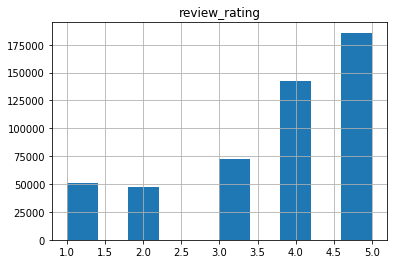

In [9]:
%matplotlib inline
df_final.hist(column='review_rating')

## Generate sentiment analysis score from this review text 

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
import re
PATTERN = r'[^a-zA]' 
df_senti = df_final[['review_id','text_x']]
senti=df_senti.to_dict('records') 
for cell in senti: 
    cell_1 = cell['text_x'].replace('\n','').replace('\n\n','').lower()
    cell_2 = re.sub(PATTERN,r' ',cell_1)
    cell_2_no_punc= cell_2.translate(str.maketrans('','', string.punctuation))
    ss = sid.polarity_scores(cell_2_no_punc)
    cell.update(ss)

In [11]:
df_senti_score=pd.DataFrame.from_dict(senti)
df_final_2 = pd.merge(df_final, df_senti_score,  how='outer',on = 'review_id')
df_final_2 = df_final_2.drop(['Unnamed: 0', 'text_x_y'], axis=1)

In [12]:
df_final_2.head()
df_final_2.to_csv('final_add_senti.csv')

## Add LDA topics as features 

In [14]:
df_final_2.head(3)

,review_id,review_rating,date,text_x_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,compound,neg,neu,pos
0,vkVSCC7xljjrAI4UGfnKEQ,5,2016-05-28,Super simple place but amazing nonetheless. It...,"['super', 'simple', 'place', 'amazing', 'nonet...",4,41,18,5,8,5,0.9551,0.0,0.638,0.362
1,n6QzIUObkYshz4dz2QRJTw,5,2016-05-28,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'changes', 'm...",7,99,46,7,24,14,0.8014,0.0,0.908,0.092
2,MV3CcKScW05u5LVfF6ok0g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,"['lester', 'located', 'beautiful', 'neighborho...",3,76,27,5,14,15,0.6249,0.0,0.925,0.075


In [49]:
df_restaunt_topics = pd.read_csv("df_restaunt_with_topics.csv")
df_restaunt_topics.shape

(499517, 31)

In [50]:
df_lda = df_restaunt_topics[['review_id', 'Topic_1','Topic_2', 'Topic_3','Topic_4','Topic_5']]
df_final_3 = pd.merge(df_lda, df_final_2, how='outer', on = 'review_id')
# df_final_3.head()
df_final_3.to_csv('final_3.csv')

In [51]:
df_final_3.columns

Index(['review_id', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5',
       'review_rating', 'date', 'text_x_x', 'clean_text', 'number_puncuation',
       'number_raw_wrds', 'number_wrds', 'number_adj', 'number_noun',
       'number_verb', 'compound', 'neg', 'neu', 'pos'],
      dtype='object')

In [18]:
df_final_3 = pd.read_csv("final_3.csv")

In [3]:
df_final_3.shape 

(499517, 21)

In [30]:
df_final_3 = df_final_3.dropna()
df_final_4 = df_final_3.drop([ 'date', 'Unnamed: 0'], axis=1)
df_final_4.columns
df_final_4.head(3)

,review_id,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,review_rating,text_x_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,compound,neg,neu,pos
0,vkVSCC7xljjrAI4UGfnKEQ,0.627663,0.052521,0.145661,0.002195,0.171961,5.0,Super simple place but amazing nonetheless. It...,"['super', 'simple', 'place', 'amazing', 'nonet...",4.0,41.0,18.0,5.0,8.0,5.0,0.9551,0.0,0.638,0.362
1,n6QzIUObkYshz4dz2QRJTw,0.466920,0.110773,0.141278,0.000992,0.280037,5.0,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'changes', 'm...",7.0,99.0,46.0,7.0,24.0,14.0,0.8014,0.0,0.908,0.092
2,MV3CcKScW05u5LVfF6ok0g,0.814398,0.086540,0.020340,0.001486,0.077236,5.0,Lester's is located in a beautiful neighborhoo...,"['lester', 'located', 'beautiful', 'neighborho...",3.0,76.0,27.0,5.0,14.0,15.0,0.6249,0.0,0.925,0.075


In [5]:
## Make sure all the cells are positive 
for cols in df_final_4.columns.tolist(): 
    df_final_4 = df_final_4.ix[df_final_4[cols] > 0]

/home/lin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
# df_final_4.head()
df_final_4.to_csv("lstm.csv")

,review_id,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,review_rating,text_x_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,compound,neg,neu,pos
0,vkVSCC7xljjrAI4UGfnKEQ,0.627663,0.052521,0.145661,0.002195,0.171961,5.0,Super simple place but amazing nonetheless. It...,"['super', 'simple', 'place', 'amazing', 'nonet...",4.0,41.0,18.0,5.0,8.0,5.0,0.9551,0.000,0.638,0.362
1,n6QzIUObkYshz4dz2QRJTw,0.466920,0.110773,0.141278,0.000992,0.280037,5.0,Small unassuming place that changes their menu...,"['small', 'unassuming', 'place', 'changes', 'm...",7.0,99.0,46.0,7.0,24.0,14.0,0.8014,0.000,0.908,0.092
2,MV3CcKScW05u5LVfF6ok0g,0.814398,0.086540,0.020340,0.001486,0.077236,5.0,Lester's is located in a beautiful neighborhoo...,"['lester', 'located', 'beautiful', 'neighborho...",3.0,76.0,27.0,5.0,14.0,15.0,0.6249,0.000,0.925,0.075
3,IXvOzsEMYtiJI0CARmj77Q,0.344673,0.363879,0.012105,0.001011,0.278332,4.0,Love coming here. Yes the place always needs t...,"['love', 'coming', 'place', 'always', 'needs',...",10.0,112.0,44.0,5.0,29.0,17.0,0.9378,0.035,0.801,0.165
4,L_9BTb55X0GDtThi6GlZ6w,0.418503,0.032174,0.423569,0.002294,0.123459,4.0,Had their chocolate almond croissant and it wa...,"['chocolate', 'almond', 'croissant', 'amazing'...",3.0,45.0,15.0,3.0,10.0,8.0,0.8176,0.000,0.839,0.161


##  ******** Upload df_final_4  csv file for ML model work************

In [33]:
# df_final_4 = pd.read_csv("lstm.csv")
df_final_4.review_rating.value_counts() 
# df_final_4.head()
### This is an inbalanced dataset, so we need to downsample this to do the prediction 

5.0    185794
4.0    142855
3.0     72701
1.0     51082
2.0     47083
Name: review_rating, dtype: int64

In [3]:
df_final_4_1 = df_final_4[df_final_4.review_rating ==1]
df_final_4_2 = df_final_4[df_final_4.review_rating ==2]
df_final_4_3 = df_final_4[df_final_4.review_rating ==3]
df_final_4_4 = df_final_4[df_final_4.review_rating ==4]
df_final_4_5 = df_final_4[df_final_4.review_rating ==5]

## Downsample the dataset and make all the rating the balanced dataset 

In [4]:
from sklearn.utils import resample
df_final_4_2_ds = resample(df_final_4_2, replace = False,n_samples=len(df_final_4_1),
                                                    random_state=123)
df_final_4_3_ds = resample(df_final_4_3, replace = False,n_samples=len(df_final_4_1),
                                                    random_state=123)
df_final_4_4_ds = resample(df_final_4_4, replace = False,n_samples=len(df_final_4_1),
                                                    random_state=123)
df_final_4_5_ds = resample(df_final_4_5, replace = False,n_samples=len(df_final_4_1),
                                                    random_state=123)
df_final_ds= pd.concat([df_final_4_1, df_final_4_2_ds,df_final_4_3_ds,df_final_4_4_ds,df_final_4_5_ds])
print(df_final_ds.review_rating.value_counts())
print(df_final_ds.shape)


5.0    19375
4.0    19375
3.0    19375
2.0    19375
1.0    19375
Name: review_rating, dtype: int64
(96875, 17)


In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/home/lin/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


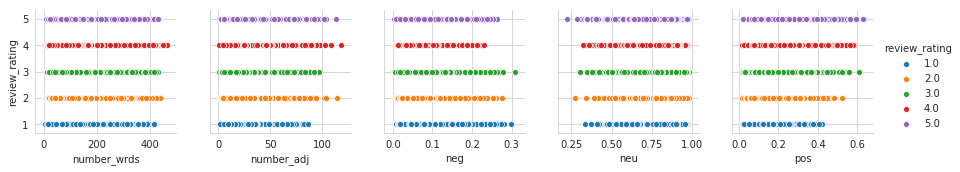

In [33]:
sns.pairplot(data = df_final_ds, hue='review_rating', y_vars=['review_rating'], x_vars=['number_wrds', 'number_adj','neg', 'neu', 'pos' ])


In [34]:
# sns.pairplot(df_final_4[['review_rating','number_wrds', 'number_adj', 'pos','number_puncuation']], hue='review_rating')

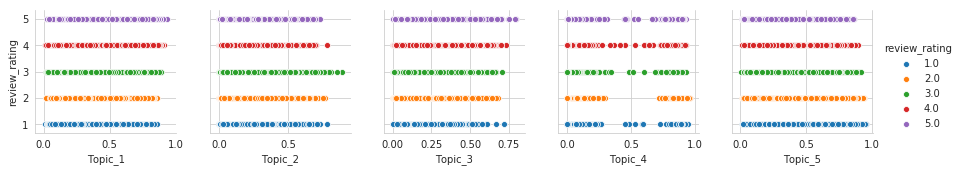

In [36]:
sns.pairplot(data = df_final_ds, hue='review_rating', y_vars=['review_rating'], x_vars=['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5' ])


In [37]:
df_final_ds.head()

,Unnamed: 0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,review_rating,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,compound,neg,neu,pos
6,13,0.237680,0.277039,0.008200,0.000610,0.476471,1.0,26.0,224.0,79.0,12.0,38.0,40.0,0.8424,0.083,0.791,0.126
16,30,0.126404,0.471867,0.010829,0.000733,0.390166,1.0,23.0,176.0,66.0,11.0,36.0,32.0,0.8063,0.029,0.884,0.087
25,43,0.278259,0.007441,0.006053,0.033992,0.674256,1.0,28.0,237.0,86.0,12.0,45.0,45.0,0.1408,0.075,0.852,0.073
34,53,0.223071,0.066424,0.157279,0.000392,0.552833,1.0,46.0,334.0,120.0,24.0,51.0,61.0,0.9605,0.100,0.744,0.156
76,118,0.147515,0.021440,0.028447,0.001531,0.801066,1.0,4.0,77.0,28.0,3.0,12.0,19.0,0.2617,0.077,0.845,0.078


In [6]:
Y = df_final_ds.review_rating
X = df_final_ds.drop(['review_rating','Unnamed: 0'], axis=1)
# Y
# X

In [ ]:
from sklearn import preprocessing 


## Logistic Regression Multinomial 


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression()
log_reg_multiNM = LogisticRegression(multi_class='multinomial',solver ='lbfgs')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.15,random_state=0)

log_reg.fit(X_train, Y_train)
log_reg_multiNM.fit(X_train, Y_train)


from sklearn import metrics

Y_pred = log_reg.predict(X_test)
Y_pred_NM = log_reg_multiNM.predict(X_test)

print(metrics.accuracy_score(Y_test, Y_pred))
print(metrics.accuracy_score(Y_test,Y_pred_NM))

/home/lin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.41873107624552713
0.3130333058078723


/home/lin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Decision tree 

In [54]:
# # training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy_dtree = dtree_model.score(X_test,Y_test)
print(accuracy_dtree)

0.3576943721871258


## SVM 

In [ ]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, Y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy_svm = svm_model_linear.score(X_test, Y_test) 
print(accuracy_svm) 
# creating a confusion matrix 
# cm = confusion_matrix(Y_test, svm_predictions) 
# cm

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train) 
  
# accuracy on X_test 
accuracy_Knn = knn.score(X_test, Y_test) 
print (accuracy_Knn)
  
# creating a confusion matrix 
# knn_predictions = knn.predict(X_test)  
# cm = confusion_matrix(Y_test, knn_predictions)  7 025 



### k 7 acu 0.25 


In [ ]:
## change the nunber of neighbors and compare the accuracy 

## Naive Bayes 

In [8]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy_GNB = gnb.score(X_test, Y_test) 
print (accuracy_GNB)  
# # creating a confusion matrix 
# cm = confusion_matrix(y_test, gnb_predictions) 

0.39134324249931185


In [ ]:
# https://scikit-learn.org/stable/modules/multiclass.html 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)


 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X) 

# How's the accuracy?
print( accuracy_score(pred_y_0, y) ) 

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) ## 44%

/home/lin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.44576460861191913
Accuracy of logistic regression classifier on test set: 0.44


## Random Forest Model 

In [ ]:
## Random Forest 

In [50]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
feature_imp_df = pd.DataFrame({'Variable':feature_imp.index, 'Importance':feature_imp.values})
feature_imp_df

,Variable,Importance
0,compound,0.230780
1,ConverSeq,0.161370
2,Topic_1,0.135453
3,Topic_5,0.120466
4,Topic_3,0.114744
5,Topic_4,0.095999
6,Topic_2,0.071890
7,AttachNum,0.035691
8,AttachTypeNum,0.033607
